In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [2]:
df = pd.read_csv("train_values.csv", index_col="building_id")
df2 = pd.read_csv("train_labels.csv", index_col="building_id")

In [3]:
df = df.merge(df2, left_index=True, right_index=True).reset_index()

In [4]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [5]:
d = {1:"low", 2:"medium", 3:"high"}
df.damage_grade = df.damage_grade.apply(lambda x: d[x])

In [6]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

<AxesSubplot:xlabel='damage_grade', ylabel='count'>

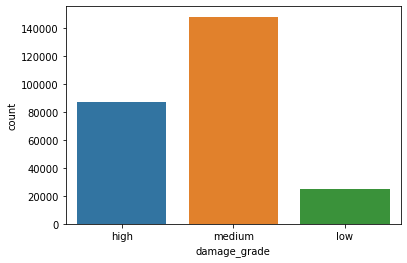

In [7]:
sns.countplot(x="damage_grade", data=df)

<AxesSubplot:xlabel='ground_floor_type', ylabel='count'>

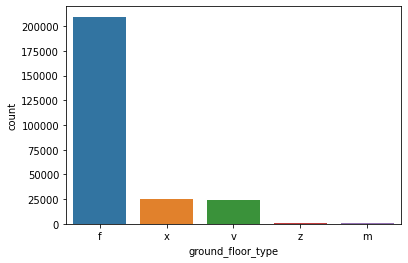

In [8]:
sns.countplot(x="ground_floor_type", data=df)

In [9]:
bins = [-1, 10, 20, 30, 40, 50, 70, 10000]
labels = ["0 a 10", "0 a 20", "20 a 30", "30 a 40", "40 a 50", "50 a 70", "70 a 10000"]
df['binned'] = pd.cut(df['age'], bins=bins, labels=labels)

In [10]:
df.binned.value_counts()

0 a 10        98634
0 a 20        68192
20 a 30       42394
30 a 40       21269
40 a 50       11968
70 a 10000     9401
50 a 70        8743
Name: binned, dtype: int64

In [11]:
g = df.groupby(["damage_grade","ground_floor_type","binned"]).agg(count=("geo_level_1_id","count")).unstack()
g

count                                         \
binned                         0 a 10 0 a 20 20 a 30 30 a 40 40 a 50 50 a 70   
damage_grade ground_floor_type                                                 
high         f                  24077  21248   14272    7406    4212    3018   
             m                     20     17      17       9       7       1   
             v                    623    354     194      88      34      13   
             x                   2517   2310    1587     785     456     314   
             z                    113     61      36      12      11      13   
low          f                   7345   2798    1251     478     256     148   
             m                     70      8       7       4       1       0   
             v                   8293   1524     337      82      10      10   
             x                   1301    467     170      69      22      11   
             z                    154     35       6       2       1       0   
medium       f                  40461  32417   20870   10545    6074    4627   
             m                    127     91      67      30      10       5   
             v                   8186   2933    1118     414     131      53   
             x                   5051   3823    2419    1328     728     518   
             z                    296    106      43      17      15      12   

                                           
binned                         70 a 10000  
damage_grade ground_floor_type             
high         f                       3035  
             m                          4  
             v                          7  
             x                        320  
             z                         27  
low          f                        198  
             m                          0  
             v                         53  
             x                         12  
             z                          1  
medium       f                       4883  
             m                         13  
             v                        136  
             x                        669  
             z                         43

In [12]:
g.columns = g.columns.get_level_values(1)
g.columns.name = None

In [13]:
g

0 a 10  0 a 20  20 a 30  30 a 40  40 a 50  \
damage_grade ground_floor_type                                              
high         f                   24077   21248    14272     7406     4212   
             m                      20      17       17        9        7   
             v                     623     354      194       88       34   
             x                    2517    2310     1587      785      456   
             z                     113      61       36       12       11   
low          f                    7345    2798     1251      478      256   
             m                      70       8        7        4        1   
             v                    8293    1524      337       82       10   
             x                    1301     467      170       69       22   
             z                     154      35        6        2        1   
medium       f                   40461   32417    20870    10545     6074   
             m                     127      91       67       30       10   
             v                    8186    2933     1118      414      131   
             x                    5051    3823     2419     1328      728   
             z                     296     106       43       17       15   

                                50 a 70  70 a 10000  
damage_grade ground_floor_type                       
high         f                     3018        3035  
             m                        1           4  
             v                       13           7  
             x                      314         320  
             z                       13          27  
low          f                      148         198  
             m                        0           0  
             v                       10          53  
             x                       11          12  
             z                        0           1  
medium       f                     4627        4883  
             m                        5          13  
             v                       53         136  
             x                      518         669  
             z                       12          43

# los levels id son como decir comuna, barrio y no se, calles

In [14]:
df.groupby(["damage_grade","geo_level_1_id"]).agg("count")

building_id  geo_level_2_id  geo_level_3_id  \
damage_grade geo_level_1_id                                                
high         0                       599             599             599   
             1                       305             305             305   
             2                       236             236             236   
             3                      2745            2745            2745   
             4                      2883            2883            2883   
...                                  ...             ...             ...   
medium       26                    12645           12645           12645   
             27                     6007            6007            6007   
             28                      157             157             157   
             29                      349             349             349   
             30                     2127            2127            2127   

                             count_floors_pre_eq    age  area_percentage  \
damage_grade geo_level_1_id                                                
high         0                               599    599              599   
             1                               305    305              305   
             2                               236    236              236   
             3                              2745   2745             2745   
             4                              2883   2883             2883   
...                                          ...    ...              ...   
medium       26                            12645  12645            12645   
             27                             6007   6007             6007   
             28                              157    157              157   
             29                              349    349              349   
             30                             2127   2127             2127   

                             height_percentage  land_surface_condition  \
damage_grade geo_level_1_id                                              
high         0                             599                     599   
             1                             305                     305   
             2                             236                     236   
             3                            2745                    2745   
             4                            2883                    2883   
...                                        ...                     ...   
medium       26                          12645                   12645   
             27                           6007                    6007   
             28                            157                     157   
             29                            349                     349   
             30                           2127                    2127   

                             foundation_type  roof_type  ...  \
damage_grade geo_level_1_id                              ...   
high         0                           599        599  ...   
             1                           305        305  ...   
             2                           236        236  ...   
             3                          2745       2745  ...   
             4                          2883       2883  ...   
...                                      ...        ...  ...   
medium       26                        12645      12645  ...   
             27                         6007       6007  ...   
             28                          157        157  ...   
             29                          349        349  ...   
             30                         2127       2127  ...   

                             has_secondary_use_hotel  \
damage_grade geo_level_1_id                            
high         0                                   599   
             1                                   305   
             2                 

In [15]:
df.groupby(["damage_grade","geo_level_2_id"]).agg("count")

building_id  geo_level_1_id  geo_level_3_id  \
damage_grade geo_level_2_id                                                
high         0                        29              29              29   
             1                        71              71              71   
             3                        13              13              13   
             4                       166             166             166   
             5                         4               4               4   
...                                  ...             ...             ...   
medium       1423                      3               3               3   
             1424                      7               7               7   
             1425                    138             138             138   
             1426                     53              53              53   
             1427                      1               1               1   

                             count_floors_pre_eq  age  area_percentage  \
damage_grade geo_level_2_id                                              
high         0                                29   29               29   
             1                                71   71               71   
             3                                13   13               13   
             4                               166  166              166   
             5                                 4    4                4   
...                                          ...  ...              ...   
medium       1423                              3    3                3   
             1424                              7    7                7   
             1425                            138  138              138   
             1426                             53   53               53   
             1427                              1    1                1   

                             height_percentage  land_surface_condition  \
damage_grade geo_level_2_id                                              
high         0                              29                      29   
             1                              71                      71   
             3                              13                      13   
             4                             166                     166   
             5                               4                       4   
...                                        ...                     ...   
medium       1423                            3                       3   
             1424                            7                       7   
             1425                          138                     138   
             1426                           53                      53   
             1427                            1                       1   

                             foundation_type  roof_type  ...  \
damage_grade geo_level_2_id                              ...   
high         0                            29         29  ...   
             1                            71         71  ...   
             3                            13         13  ...   
             4                           166        166  ...   
             5                             4          4  ...   
...                                      ...        ...  ...   
medium       1423                          3          3  ...   
             1424                          7          7  ...   
             1425                        138        138  ...   
             1426                         53         53  ...   
             1427                          1          1  ...   

                             has_secondary_use_hotel  \
damage_grade geo_level_2_id                            
high         0                                    29   
             1                                    71   
             3                                    13   
 

In [16]:
df.groupby(["damage_grade","geo_level_3_id"]).agg("count")

building_id  geo_level_1_id  geo_level_2_id  \
damage_grade geo_level_3_id                                                
high         0                         2               2               2   
             1                         4               4               4   
             6                        13              13              13   
             8                        14              14              14   
             9                         2               2               2   
...                                  ...             ...             ...   
medium       12562                     3               3               3   
             12563                    23              23              23   
             12564                     6               6               6   
             12565                     2               2               2   
             12567                     1               1               1   

                             count_floors_pre_eq  age  area_percentage  \
damage_grade geo_level_3_id                                              
high         0                                 2    2                2   
             1                                 4    4                4   
             6                                13   13               13   
             8                                14   14               14   
             9                                 2    2                2   
...                                          ...  ...              ...   
medium       12562                             3    3                3   
             12563                            23   23               23   
             12564                             6    6                6   
             12565                             2    2                2   
             12567                             1    1                1   

                             height_percentage  land_surface_condition  \
damage_grade geo_level_3_id                                              
high         0                               2                       2   
             1                               4                       4   
             6                              13                      13   
             8                              14                      14   
             9                               2                       2   
...                                        ...                     ...   
medium       12562                           3                       3   
             12563                          23                      23   
             12564                           6                       6   
             12565                           2                       2   
             12567                           1                       1   

                             foundation_type  roof_type  ...  \
damage_grade geo_level_3_id                              ...   
high         0                             2          2  ...   
             1                             4          4  ...   
             6                            13         13  ...   
             8                            14         14  ...   
             9                             2          2  ...   
...                                      ...        ...  ...   
medium       12562                         3          3  ...   
             12563                        23         23  ...   
             12564                         6          6  ...   
             12565                         2          2  ...   
             12567                         1          1  ...   

                             has_secondary_use_hotel  \
damage_grade geo_level_3_id                            
high         0                                     2   
             1                                     4   
             6                                    13   
 

In [17]:
df.groupby(["damage_grade","count_floors_pre_eq"]).count()

building_id  geo_level_1_id  geo_level_2_id  \
damage_grade count_floors_pre_eq                                                
high         1                          10674           10674           10674   
             2                          50062           50062           50062   
             3                          24601           24601           24601   
             4                           1343            1343            1343   
             5                            511             511             511   
             6                             23              23              23   
             7                              4               4               4   
low          1                           8969            8969            8969   
             2                          12593           12593           12593   
             3                           2537            2537            2537   
             4                            707             707             707   
             5                            254             254             254   
             6                             53              53              53   
             7                             10              10              10   
             9                              1               1               1   
medium       1                          20798           20798           20798   
             2                          93968           93968           93968   
             3                          28479           28479           28479   
             4                           3374            3374            3374   
             5                           1481            1481            1481   
             6                            133             133             133   
             7                             25              25              25   
             8                              1               1               1   

                                  geo_level_3_id    age  area_percentage  \
damage_grade count_floors_pre_eq                                           
high         1                             10674  10674            10674   
             2                             50062  50062            50062   
             3                             24601  24601            24601   
             4                              1343   1343             1343   
             5                               511    511              511   
             6                                23     23               23   
             7                                 4      4                4   
low          1                              8969   8969             8969   
             2                             12593  12593            12593   
             3                              2537   2537             2537   
             4                               707    707              707   
             5                               254    254              254   
             6                                53     53               53   
             7                                10     10               10   
             9                                 1      1                1   
medium       1                             20798  20798            20798   
             2                             93968  93968            93968   
             3                             28479  28479            28479   
             4                              3374   3374             3374   
             5                              1481   1481             1481   
             6                               133    133              133   
             7                                25     25               25   
             8                                 1      1                1   

                                  height_percentage  land_surface_condition  \
damage_grade count_floors_pr

In [18]:
df.groupby(["damage_grade","has_superstructure_rc_engineered"]).count()

building_id  geo_level_1_id  \
damage_grade has_superstructure_rc_engineered                                
high         0                                       87143           87143   
             1                                          75              75   
low          0                                       22468           22468   
             1                                        2656            2656   
medium       0                                      146857          146857   
             1                                        1402            1402   

                                               geo_level_2_id  geo_level_3_id  \
damage_grade has_superstructure_rc_engineered                                   
high         0                                          87143           87143   
             1                                             75              75   
low          0                                          22468           22468   
             1                                           2656            2656   
medium       0                                         146857          146857   
             1                                           1402            1402   

                                               count_floors_pre_eq     age  \
damage_grade has_superstructure_rc_engineered                                
high         0                                               87143   87143   
             1                                                  75      75   
low          0                                               22468   22468   
             1                                                2656    2656   
medium       0                                              146857  146857   
             1                                                1402    1402   

                                               area_percentage  \
damage_grade has_superstructure_rc_engineered                    
high         0                                           87143   
             1                                              75   
low          0                                           22468   
             1                                            2656   
medium       0                                          146857   
             1                                            1402   

                                               height_percentage  \
damage_grade has_superstructure_rc_engineered                      
high         0                                             87143   
             1                                                75   
low          0                                             22468   
             1                                              2656   
medium       0                                            146857   
             1                                              1402   

                                               land_surface_condition  \
damage_grade has_superstructure_rc_engineered                           
high         0                                                  87143   
             1                                                     75   
low          0                                                  22468   
             1                                                   2656   
medium       0                                                 146857   
             1                                                   1402   

                                               foundation_type  ...  \
damage_grade has_superstructure_rc_engineered                   ...   
high         0                                           87143  ...   
             1                                              75  ...   
low          0                                           22468  ...   
             1                                            2656  ...   
medium       0                                          146857 

In [80]:
df["damage_grade"].value_counts()

medium    148259
high       87218
low        25124
Name: damage_grade, dtype: int64

In [81]:
a = df.groupby(["has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","damage_grade"]).agg(count=("building_id","count"))

In [82]:
a = a.reset_index()

In [83]:
def fun(value):
    if( value == 3 ):
        return "Both"
    if( value == 2 ):
        return "Engineered"
    if( value == 1 ):
        return "Non_engineered"
    return "None"

In [84]:
a["superstructure_rc"] = a["has_superstructure_rc_non_engineered"] + a["has_superstructure_rc_engineered"]*2
a["superstructure_rc"] = a["superstructure_rc"].transform(fun)

In [88]:
a = a.drop(columns=["has_superstructure_rc_non_engineered","has_superstructure_rc_engineered"])

KeyError: "['has_superstructure_rc_non_engineered' 'has_superstructure_rc_engineered'] not found in axis"

In [89]:
a

,damage_grade,count,superstructure_rc
0,high,85737,None
1,low,18671,None
2,medium,141056,None
3,high,71,Engineered
4,low,2596,Engineered
5,medium,1371,Engineered
6,high,1406,Non_engineered
7,low,3797,Non_engineered
8,medium,5801,Non_engineered
9,high,4,Both


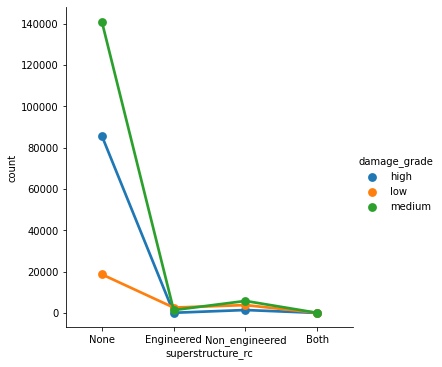

In [90]:
sns.catplot(x="superstructure_rc", y="count", hue="damage_grade", kind="point", data=a)